# Risk analysis Bank Domain

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/Banking - Banking_Cleaned.csv')


In [5]:
df

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,BRID,GenderId,GenderID,IAId,IAID
0,IND81288,Raymond Mills,24,34324,6/5/2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,12249.96,1134475.30,1,2,1,Retail,1,Male,1,Victor Dean
1,IND65833,Julia Spencer,23,42205,10/12/2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,61162.31,2000526.10,1,3,2,Institutional,1,Male,2,Jeremy Porter
2,IND47499,Stephen Murray,27,7314,25/01/2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,79071.78,548137.58,1,3,3,Private Bank,2,Female,3,Ernest Knight
3,IND72498,Virginia Garza,40,34594,28/03/2019,Steve Diaz,American,Geologist II,Mid,Silver,...,57513.65,1148402.29,0,4,4,Commercial,1,Male,4,Eric Shaw
4,IND60181,Melissa Sanders,46,41269,20/07/2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,30012.14,1674412.12,0,3,1,Retail,2,Female,5,Kevin Kim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,IND66827,Earl Hall,82,8760,9/10/2014,Joshua Bennett,American,Accounting Assistant III,High,Gold,...,12947.31,1238859.91,1,3,3,Private Bank,2,Female,4,Eric Shaw
2996,IND40556,Billy Williamson,44,32837,5/2/2009,Dennis Ruiz,European,Paralegal,Mid,Gold,...,23205.69,277171.07,1,2,3,Private Bank,2,Female,5,Kevin Kim
2997,IND72414,Victor Black,70,36088,29/12/2009,Joshua Ryan,American,Statistician IV,Low,Jade,...,30291.81,502947.22,2,2,3,Private Bank,2,Female,6,Victor Rogers
2998,IND46652,Andrew Ford,56,24871,13/02/2006,Nicholas Cunningham,European,Human Resources Assistant III,Mid,Jade,...,6413.14,1538368.60,3,1,3,Private Bank,2,Female,7,Eugene Cunningham


In [6]:
df.head(5)

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,BRID,GenderId,GenderID,IAId,IAID
0,IND81288,Raymond Mills,24,34324,6/5/2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,12249.96,1134475.30,1,2,1,Retail,1,Male,1,Victor Dean
1,IND65833,Julia Spencer,23,42205,10/12/2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,61162.31,2000526.10,1,3,2,Institutional,1,Male,2,Jeremy Porter
2,IND47499,Stephen Murray,27,7314,25/01/2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,79071.78,548137.58,1,3,3,Private Bank,2,Female,3,Ernest Knight
3,IND72498,Virginia Garza,40,34594,28/03/2019,Steve Diaz,American,Geologist II,Mid,Silver,...,57513.65,1148402.29,0,4,4,Commercial,1,Male,4,Eric Shaw
4,IND60181,Melissa Sanders,46,41269,20/07/2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,30012.14,1674412.12,0,3,1,Retail,2,Female,5,Kevin Kim


In [7]:
df.shape

(3000, 28)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client ID                 3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

In [9]:
df.describe()

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [10]:
# this it to create a categorical distribution of the Estimated icome

bins = [0,100000,300000,float('inf')]
labels = ['Low','Medium','High']

df['Income_Category'] = pd.cut(df['Estimated Income'],bins=bins,labels=labels)

In [11]:
df['Income_Category'].value_counts()


,count
Income_Category,
Medium,1517
Low,1027
High,456


<Axes: xlabel='Income_Category'>

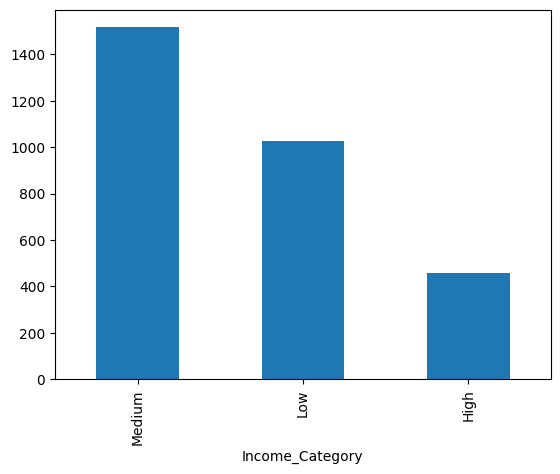

In [12]:
df['Income_Category'].value_counts().plot(kind='bar')


<Axes: xlabel='GenderID'>

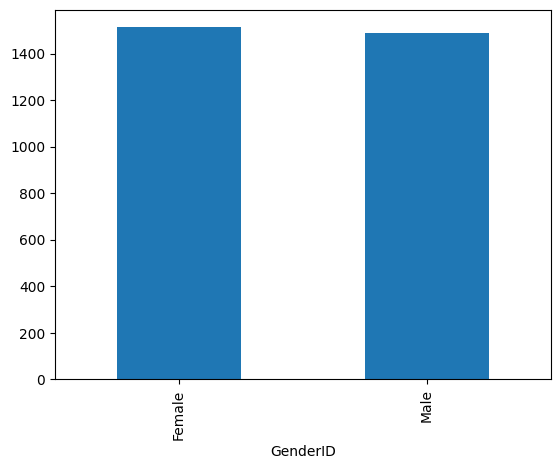

In [13]:
df['GenderID'].value_counts().plot(kind='bar')

In [14]:
categorical_cols = df[["Risk Weighting","Nationality","Occupation","Fee Structure","Loyalty Classification","Properties Owned","Risk Weighting","Occupation","Income_Category"]].columns
for col in categorical_cols:
  print(f"\nValue Counts for '{col}':")
  display(df[col].value_counts())


Value Counts for 'Risk Weighting':


,count
Risk Weighting,
2,1222
1,836
3,460
4,322
5,160



Value Counts for 'Nationality':


,count
Nationality,
European,1309
Asian,754
American,507
Australian,254
African,176



Value Counts for 'Occupation':


,count
Occupation,
Associate Professor,28
Structural Analysis Engineer,28
Recruiter,25
Account Coordinator,24
Human Resources Manager,24
...,...
Office Assistant IV,8
Automation Specialist I,7
Computer Systems Analyst I,6



Value Counts for 'Fee Structure':


,count
Fee Structure,
High,1476
Mid,962
Low,562



Value Counts for 'Loyalty Classification':


,count
Loyalty Classification,
Jade,1331
Silver,767
Gold,585
Platinum,317



Value Counts for 'Properties Owned':


,count
Properties Owned,
2,777
1,776
3,742
0,705



Value Counts for 'Risk Weighting':


,count
Risk Weighting,
2,1222
1,836
3,460
4,322
5,160



Value Counts for 'Occupation':


,count
Occupation,
Associate Professor,28
Structural Analysis Engineer,28
Recruiter,25
Account Coordinator,24
Human Resources Manager,24
...,...
Office Assistant IV,8
Automation Specialist I,7
Computer Systems Analyst I,6



Value Counts for 'Income_Category':


,count
Income_Category,
Medium,1517
Low,1027
High,456


In [15]:
print("Descriptive Statistics for Numerical Columns:")
df.describe()

Descriptive Statistics for Numerical Columns:


,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


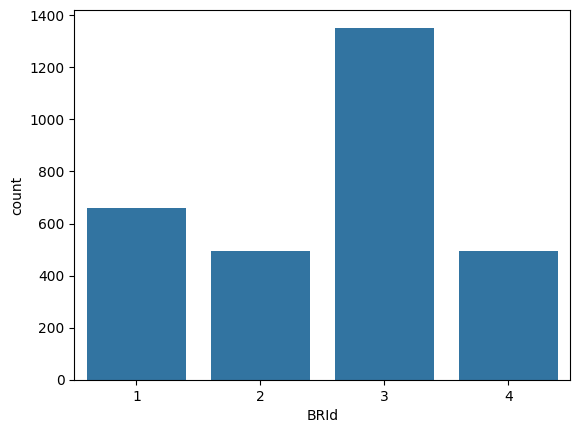

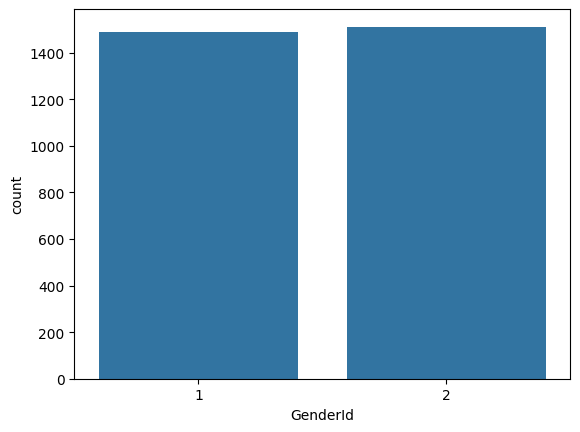

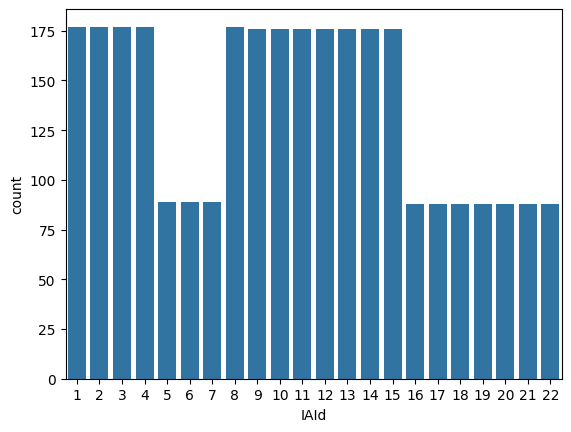

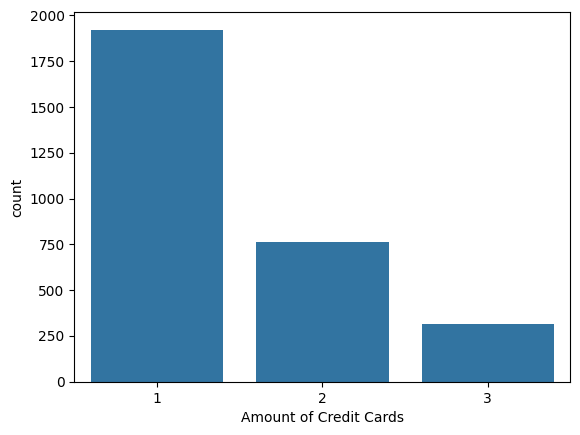

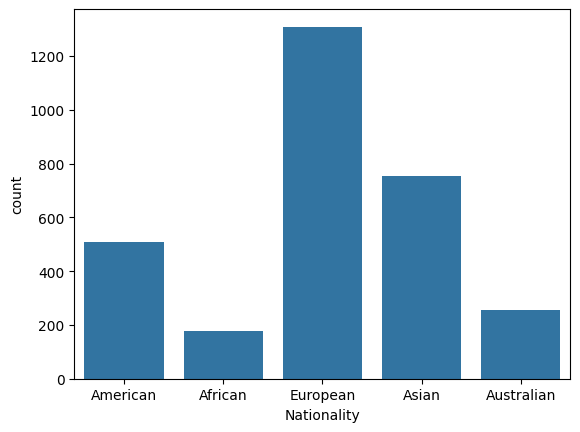

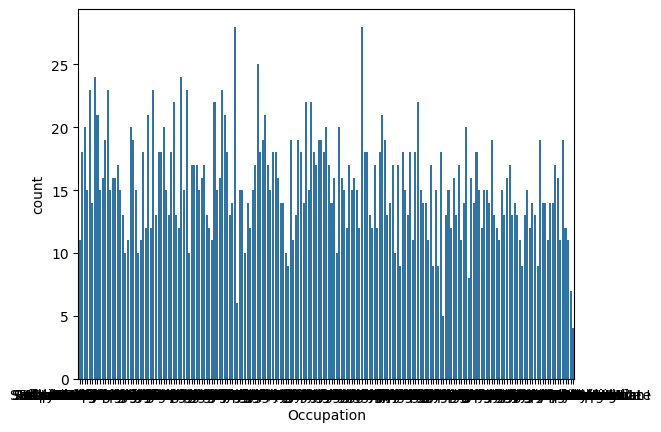

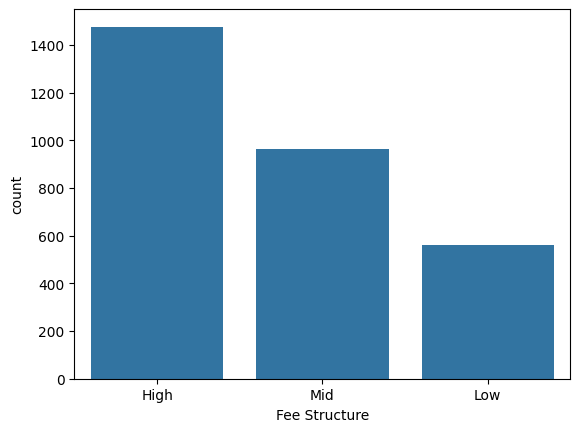

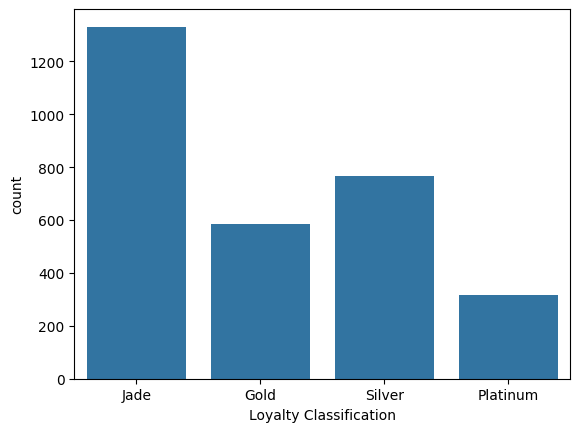

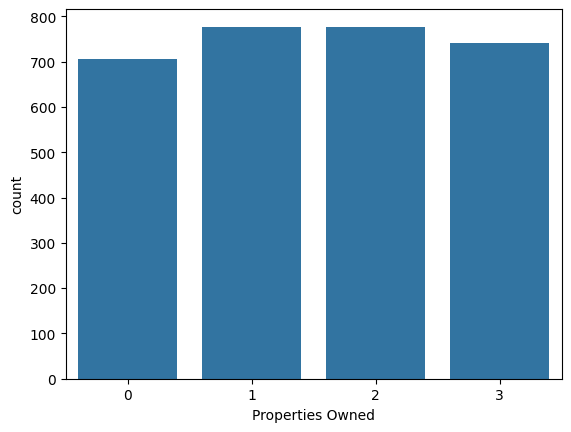

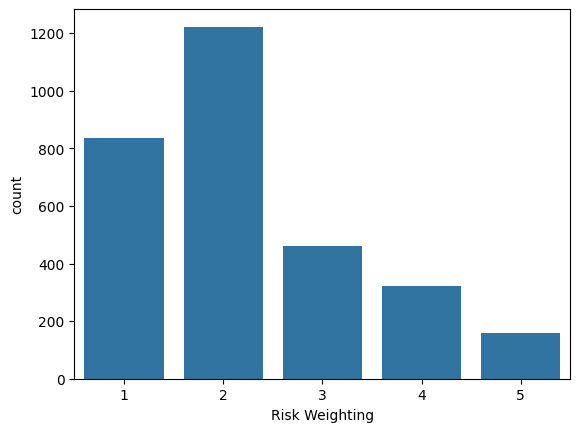

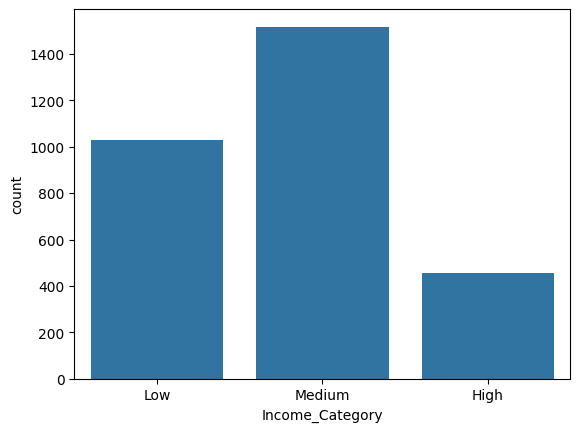

In [16]:
for i, predictor in enumerate(df[["BRId", "GenderId", "IAId", "Amount of Credit Cards", "Nationality", "Occupation", "Fee Structure", "Loyalty Classification", "Properties Owned", "Risk Weighting", "Income_Category"]].columns):
    plt.figure(i)
    sns.countplot(data=df, x=predictor)

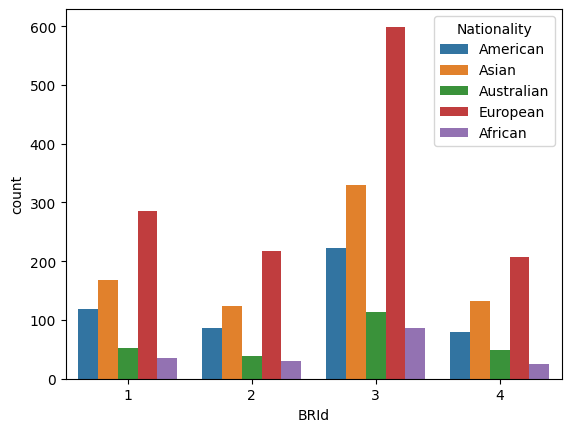

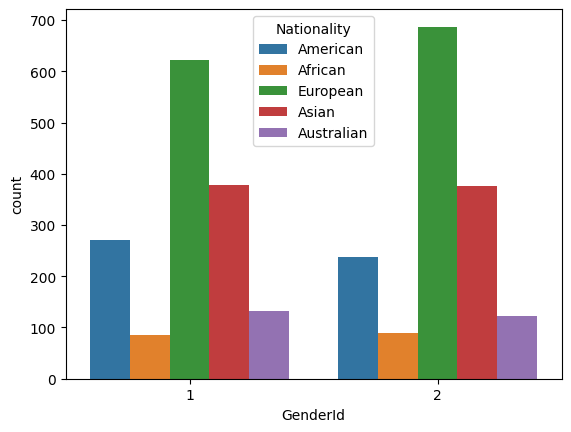

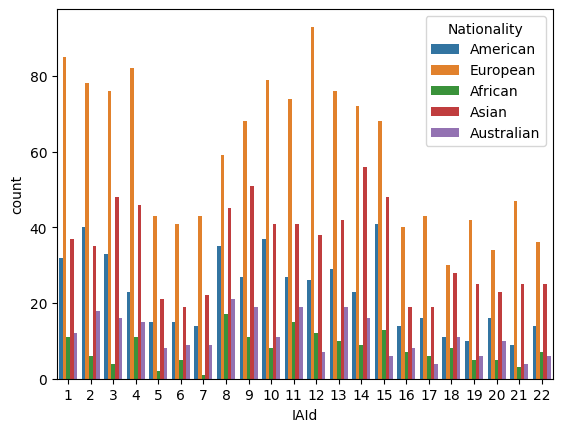

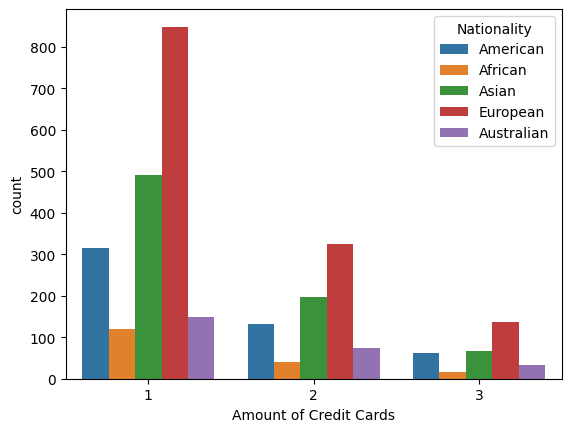

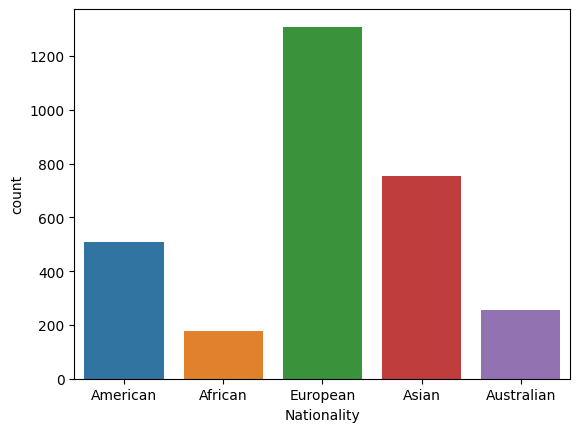

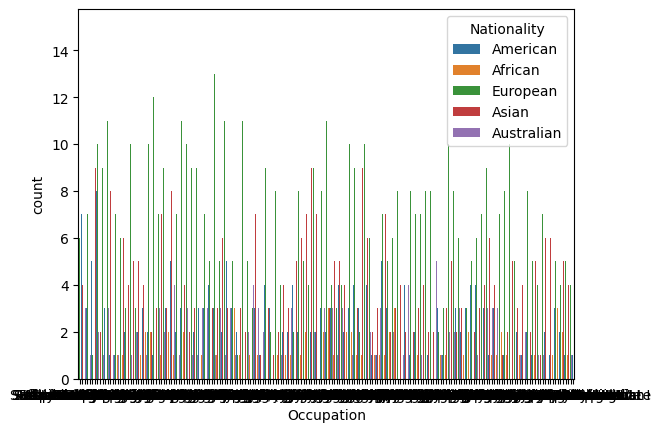

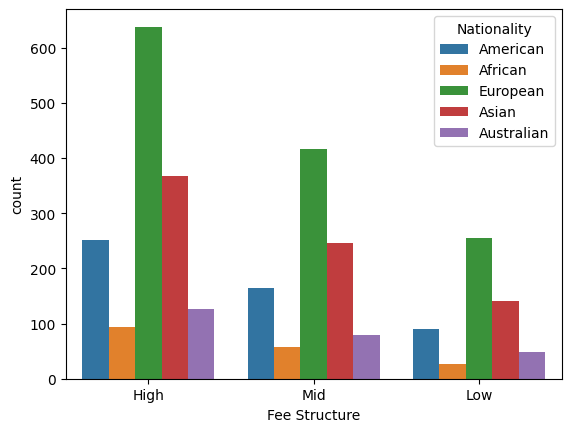

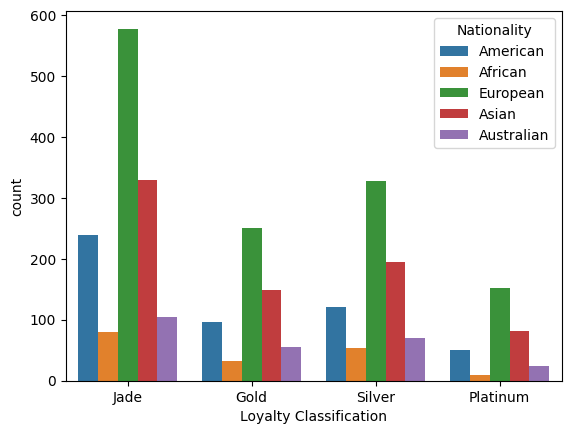

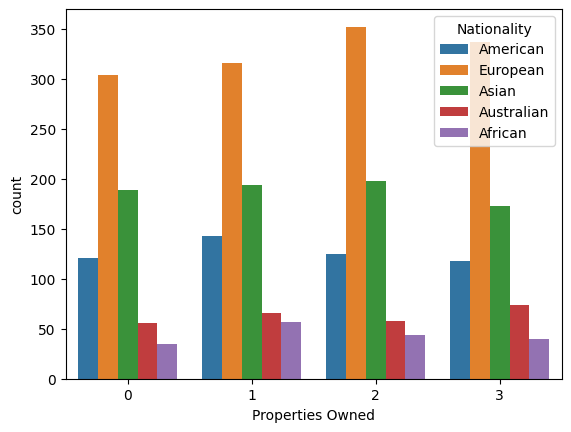

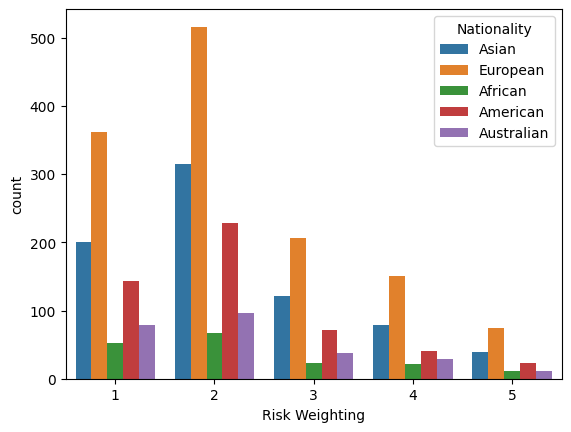

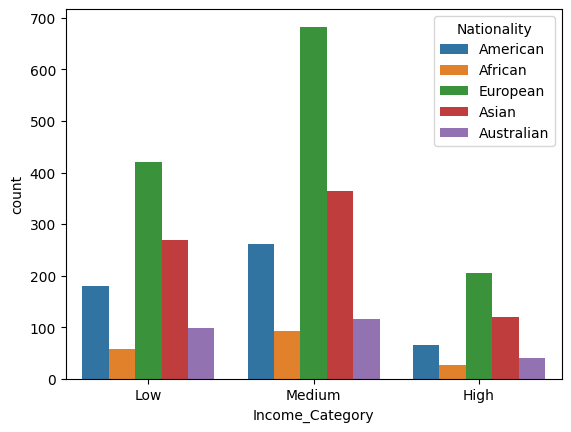

In [17]:
for i, predictor in enumerate(df[["BRId", "GenderId", "IAId", "Amount of Credit Cards", "Nationality", "Occupation", "Fee Structure", "Loyalty Classification", "Properties Owned", "Risk Weighting", "Income_Category"]].columns):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Nationality')

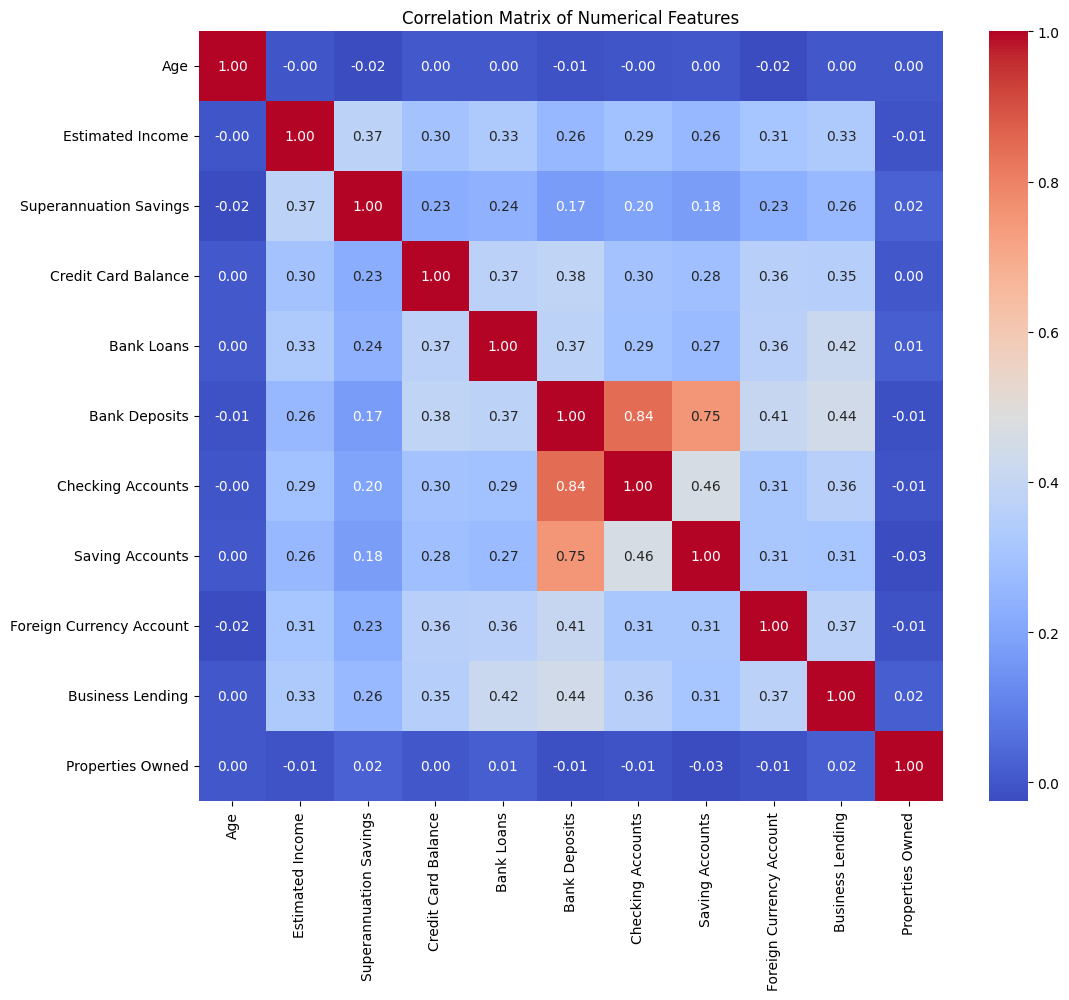

In [18]:
# Select numerical columns for correlation analysis
numerical_cols = ['Age', 'Estimated Income', 'Superannuation Savings', 'Credit Card Balance',
                  'Bank Loans', 'Bank Deposits', 'Checking Accounts', 'Saving Accounts',
                  'Foreign Currency Account', 'Business Lending', 'Properties Owned']


corre_matrix = df[numerical_cols].corr()


plt.figure(figsize=(12, 10))
sns.heatmap(corre_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

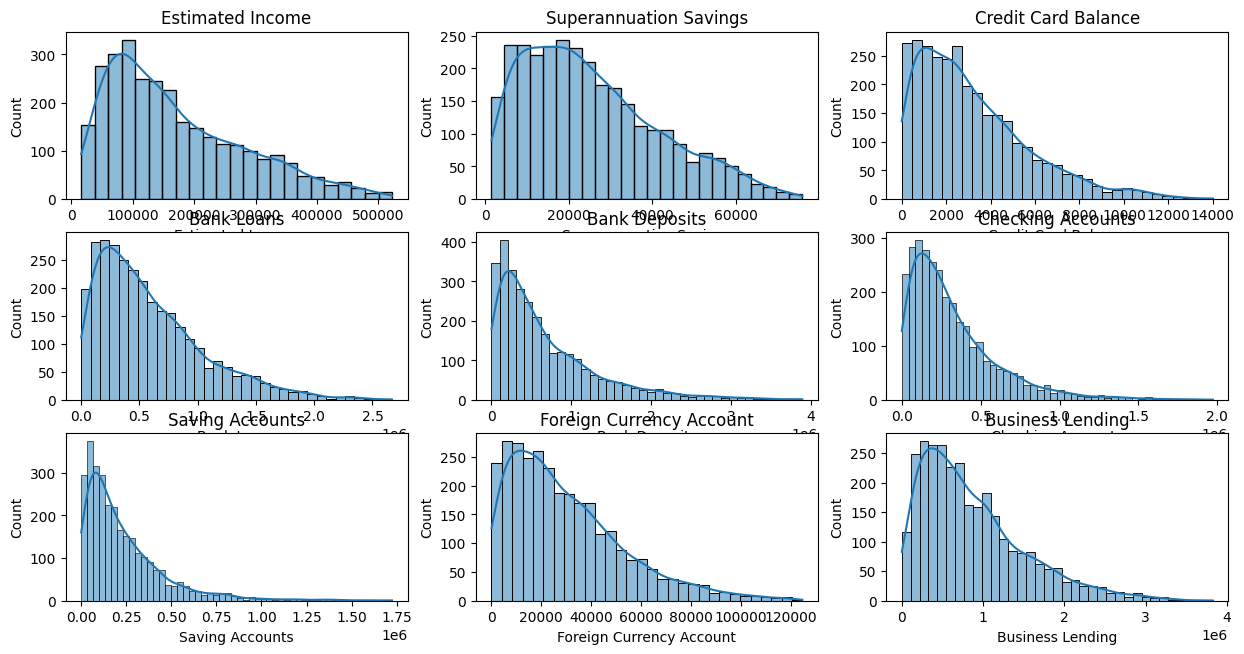

In [19]:
numerical_cols = ['Estimated Income', 'Superannuation Savings', 'Credit Card Balance', 'Bank Loans', 'Bank Deposits', 'Checking Accounts', 'Saving Accounts', 'Foreign Currency Account', 'Business Lending']

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
  plt.subplot(4,3,i+1)
  sns.histplot(df[col],kde=True)
  plt.title(col)
plt.show()

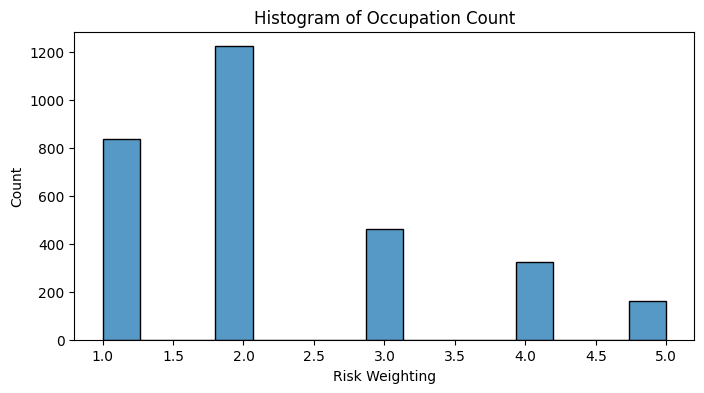

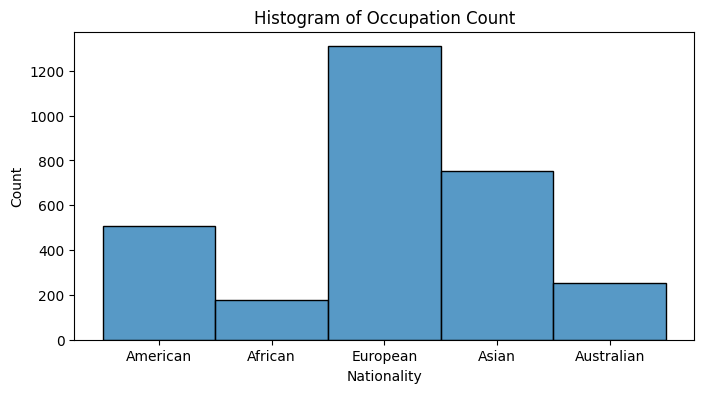

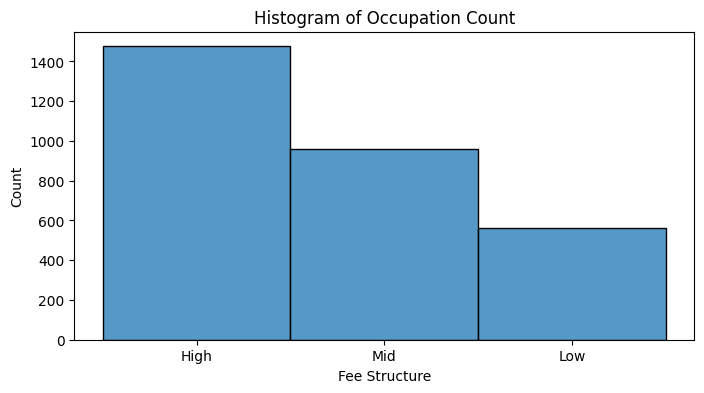

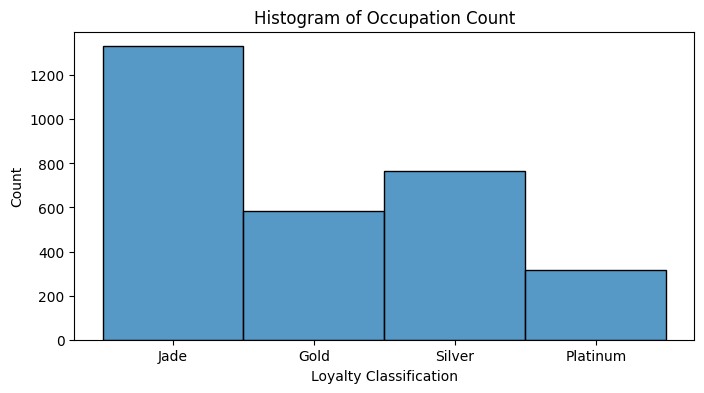

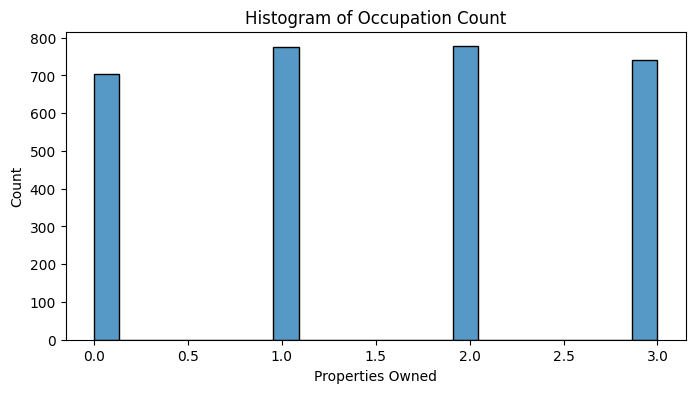

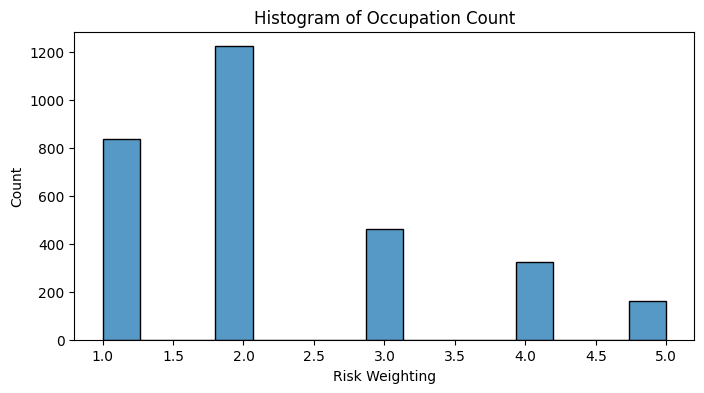

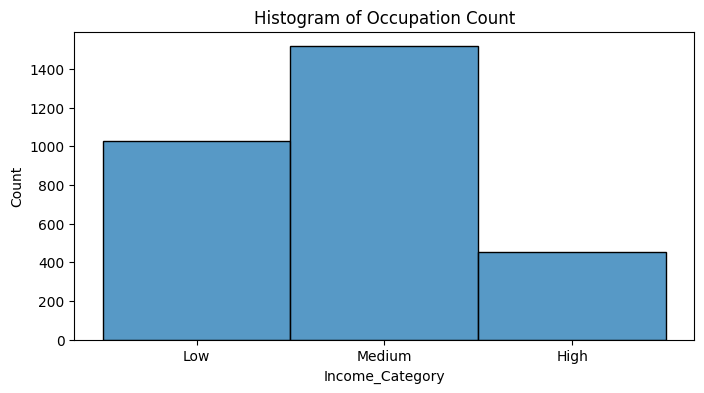

In [20]:
for col in categorical_cols:
  if col == "Occupation":
    continue
  plt.figure(figsize=(8,4))
  sns.histplot(df[col])
  plt.title('Histogram of Occupation Count')
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

In [21]:
df.to_csv('output.csv', index=False)


# Key Insights from EDA

**Customer Demographics:**

The dataset covered customers aged between early 20s to 80s, with varied nationalities and occupations.This demographic diversity highlighted the importance of segmenting customers for more accurate risk profiling.

**Data Cleaning Observations:**

- Inconsistencies such as mixed date formats (MM/DD/YYYY vs DD/MM/YYYY) and quoted string categories (e.g., "High" in fee structure) were identified and cleaned.

- Null values and formatting issues were handled to ensure clean, analysis-ready data.

**Feature Distributions:**

- Financial features like Account Balance, Credit Score, and Loan Amount were found to be highly skewed, necessitating normalization or transformation before modeling.

- Categorical variables like Loyalty Classification and Fee Structure were explored using count plots and bar graphs.

**Correlation Analysis:**

- Strong correlations were observed between:

- Credit Score and Loan Approval

- Late Payments and Account Balance

- Foreign Currency Account and Total Relationship Amount

- These relationships help prioritize variables for risk prediction.

**Outlier Detection:**

- Detected significant outliers in Loan Amount and Foreign Currency Account values.

- Applied appropriate capping/trimming techniques to reduce distortion in model inputs.

**Risk Indicators Identified:**

- Key indicators of high-risk customers included:

- Low credit scores

- High number of late payments

- Low total relationship value

- High fee structure with low loyalty classification

**Data Visualization:**

- Used Seaborn and Matplotlib to build insightful plots:

- Heatmaps to explore correlation

- Distribution plots for financial metrics

- Count plots for categorical variable